# EDA: Modality Intensity Distribution Analysis

This notebook analyzes the intensity distribution of normalized values across different modalities.

## Objectives:
- Randomly sample 10 series from each modality (CTA, MRA, MRI T2, MRI T1post)
- Extract 5-slice windows from each series
- Apply proper modality-specific normalization
- **Limit to 75,000 pixels per modality** for efficient histogram creation
- Flatten intensity values and create distribution analysis
- Visualize distributions across all modalities

## Key Insights:
- **CTA**: Uses CT normalization (fixed range [0, 500] → [0, 255])
- **MR Modalities**: Use MR normalization (adaptive percentiles → [0, 255])
- Compare how different normalization strategies affect intensity distributions

---


In [1]:
# Import required libraries
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from collections import defaultdict
import warnings
warnings.filterwarnings('ignore')

# Add project root to path
sys.path.append('.')

# Import required modules
from utils import ID_COL, load_cached_volume_with_renormalization, take_window
from normalization import get_modality_normalization, apply_ct_normalization, apply_statistical_normalization
from config import Config

# Set random seed for reproducibility
np.random.seed(42)

# Configuration
NUM_SAMPLES_PER_MODALITY = 10
WINDOW_OFFSETS = (-2, -1, 0, 1, 2)  # 5-slice windows
PLOT_STYLE = 'seaborn-v0_8'
FIGURE_SIZE = (15, 10)
MAX_PIXELS_PER_MODALITY = 75000  # Limit pixels for efficient histogram creation

print('🔍 Modality Intensity Distribution Analysis')
print('=' * 60)


🔍 Modality Intensity Distribution Analysis


## 1. Data Loading and Configuration


In [2]:
# Configuration
cache_dir = "/workspace/Datasets/rsna-intracranial-aneurysm-detection/processed_data/2_5d_volumes_full"
train_csv_path = "/workspace/Datasets/rsna-intracranial-aneurysm-detection/train.csv"

print("📊 Loading data...")

# Load train.csv
if not os.path.exists(train_csv_path):
    raise FileNotFoundError(f"Train CSV not found: {train_csv_path}")

df = pd.read_csv(train_csv_path)
print(f"✅ Loaded train.csv with {len(df)} samples")

# Verify cache directory
if not os.path.exists(cache_dir):
    raise FileNotFoundError(f"Cache directory not found: {cache_dir}")

# Check available modalities
modalities = df['Modality'].value_counts()
print(f"📋 Available modalities: {dict(modalities)}")


📊 Loading data...
✅ Loaded train.csv with 4348 samples
📋 Available modalities: {'CTA': np.int64(1808), 'MRA': np.int64(1252), 'MRI T2': np.int64(983), 'MRI T1post': np.int64(305)}


## 2. Random Sampling by Modality


In [3]:
print(f"\n🎯 Sampling {NUM_SAMPLES_PER_MODALITY} series from each modality...")

sampled_series = {}
modalities = ['CTA', 'MRA', 'MRI T2', 'MRI T1post']

for modality in modalities:
    modality_df = df[df['Modality'] == modality]
    
    if len(modality_df) == 0:
        print(f"⚠️  No samples found for {modality}")
        continue
    
    # Randomly sample
    n_samples = min(NUM_SAMPLES_PER_MODALITY, len(modality_df))
    sampled = modality_df.sample(n=n_samples, random_state=42)
    sampled_series[modality] = sampled['SeriesInstanceUID'].tolist()
    
    print(f"  {modality}: {len(sampled_series[modality])} samples")

print(f"\n📋 Sampled series summary:")
for modality, series_list in sampled_series.items():
    print(f"  {modality}: {len(series_list)} series")



🎯 Sampling 10 series from each modality...
  CTA: 10 samples
  MRA: 10 samples
  MRI T2: 10 samples
  MRI T1post: 10 samples

📋 Sampled series summary:
  CTA: 10 series
  MRA: 10 series
  MRI T2: 10 series
  MRI T1post: 10 series


## 3. Intensity Analysis and Visualization

The following cells will:
1. Extract windows from volumes
2. Apply proper normalization
3. Analyze intensity distributions
4. Create comprehensive visualizations


🔍 Modality Intensity Distribution Analysis
📊 Loading data...
✅ Loaded train.csv with 4348 samples
📋 Available modalities: {'CTA': np.int64(1808), 'MRA': np.int64(1252), 'MRI T2': np.int64(983), 'MRI T1post': np.int64(305)}

🎯 Sampling 10 series from each modality...
  CTA: 10 samples
  MRA: 10 samples
  MRI T2: 10 samples
  MRI T1post: 10 samples

🔍 Analyzing intensity distributions...
📊 Limiting to 75,000 pixels per modality for efficient visualization

  Processing CTA...


    ✅ 1.2.826.0.1.3680043.8.498.87747731916384697437923650085841297675: 250,880 intensity values
    ✅ 1.2.826.0.1.3680043.8.498.10489902145908525186969095759982595916: 250,880 intensity values
    ✅ 1.2.826.0.1.3680043.8.498.26988990396685829294369446739611566704: 250,880 intensity values
    ✅ 1.2.826.0.1.3680043.8.498.43020226250723259313976078716898149912: 250,880 intensity values
    ✅ 1.2.826.0.1.3680043.8.498.88154099014328375563770982564715839977: 250,880 intensity values
    ✅ 1.2.826.0.1.3680043.8.498.33789953602683757116927708606798309105: 250,880 intensity values
    ✅ 1.2.826.0.1.3680043.8.498.12952434783419596241938447471550315903: 250,880 intensity values
    ✅ 1.2.826.0.1.3680043.8.498.94681271089392188655883804079400350157: 250,880 intensity values
    ✅ 1.2.826.0.1.3680043.8.498.12869600187010209940230704337229597106: 250,880 intensity values
    ✅ 1.2.826.0.1.3680043.8.498.14796539268266628815319821240293937067: 250,880 intensity values
    🔄 Randomly sampled to 75,0

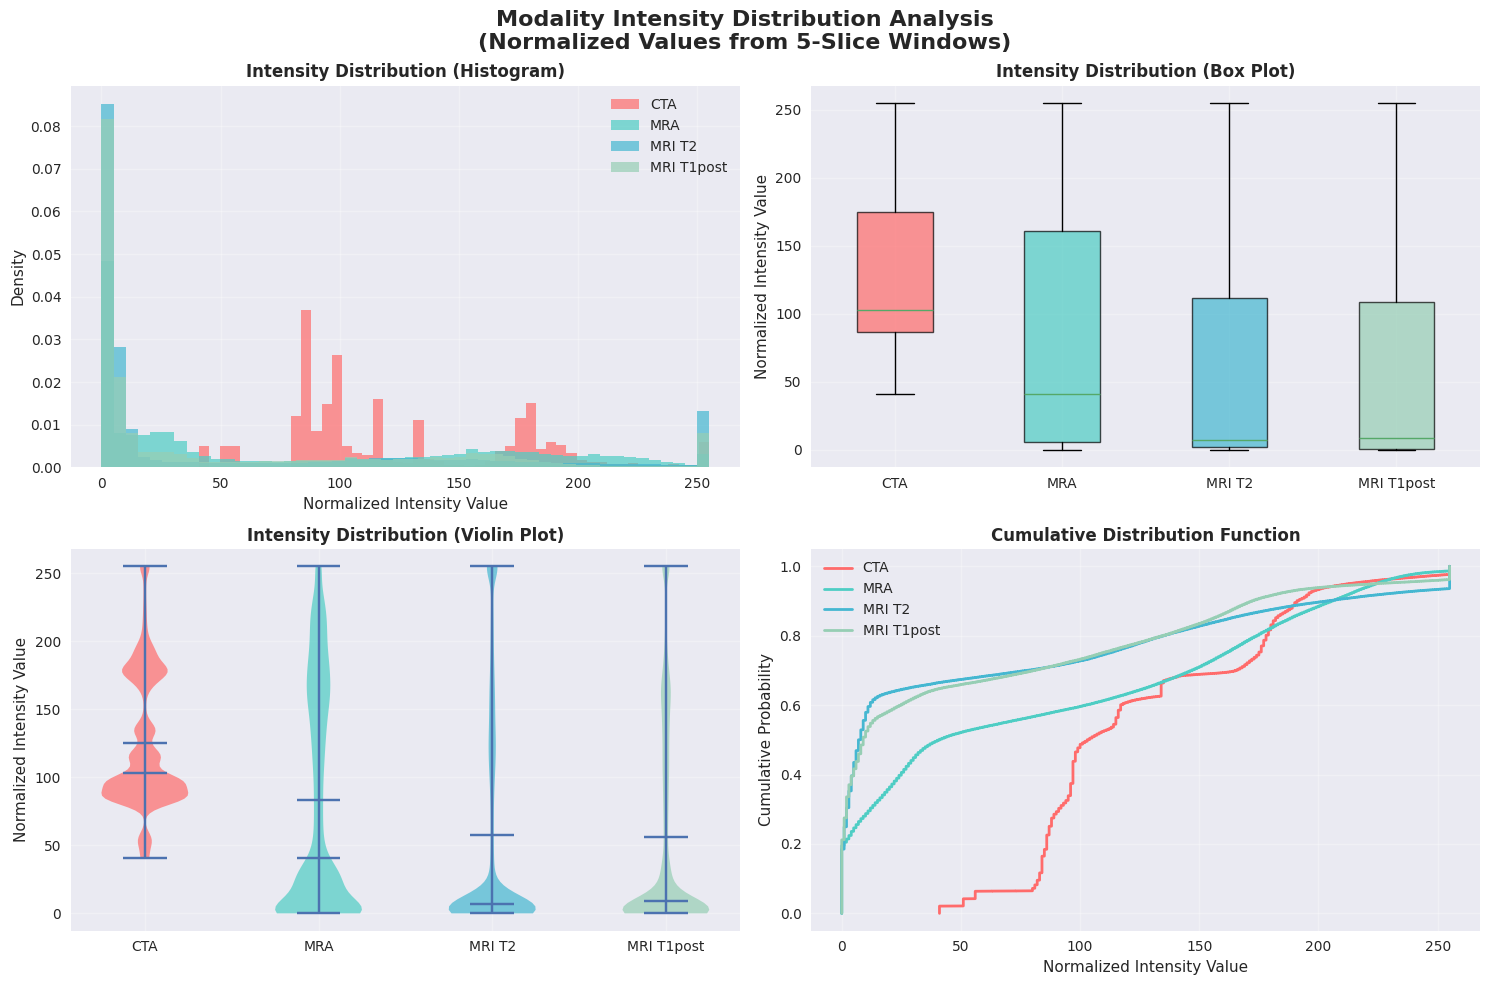


✅ Analysis completed successfully!


In [4]:
# Run the complete analysis using the script functions
exec(open('eda_modality_intensity_distribution.py').read())
